# Modeling

### Imports

In [1]:
#import statements
import pandas as pd
import numpy as np

#data visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#sci-kit learn
import sklearn
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

### Import cleaned data

In [2]:
df = pd.read_csv('../data/water_well_train_clean.csv')

In [3]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_label,status_group,coordinates,distance
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,"[-9.85632177, 34.93809275]",0.001616
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,"[-2.14746569, 34.6987661]",0.000694
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,"[-3.82132853, 37.46066446]",0.003466
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,"[-11.15529772, 38.48616088]",0.001329
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,"[-1.82535885, 31.13084671]",0.005407


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57588 entries, 0 to 59399
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     57588 non-null  int64  
 1   amount_tsh             57588 non-null  float64
 2   date_recorded          57588 non-null  object 
 3   funder                 57588 non-null  object 
 4   gps_height             57588 non-null  int64  
 5   installer              57588 non-null  object 
 6   longitude              57588 non-null  float64
 7   latitude               57588 non-null  float64
 8   wpt_name               57588 non-null  object 
 9   num_private            57588 non-null  int64  
 10  basin                  57588 non-null  object 
 11  subvillage             57588 non-null  object 
 12  region                 57588 non-null  object 
 13  region_code            57588 non-null  int64  
 14  district_code          57588 non-null  int64  
 15  lg

In [5]:
df.isna().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
s

In [6]:
df['region_code'] = df['region_code'].astype(str)
df['district_code'] = df['district_code'].astype(str)

# First Model

## Setting up Pipelines

First model will include the following features:
    
amount_tsh,
installer, 
gps_height, 
basin, 
region, 
district_code, 
lga, 
population, 
public_meeting, 
management, 
permit, 
extraction_type, 
payment, 
water_quality, 
quantity, 
source, 
waterpoint_type

With the target:
status_group

In [7]:
X = df.drop('status_group', axis=1)

In [8]:
y = df['status_group']

In [9]:
picked_features = ['amount_tsh', 'installer',  'gps_height', 'basin', 'region', 'district_code', 'lga', 'population', 
                   'public_meeting', 'management', 'permit', 'extraction_type', 'payment', 'water_quality', 'quantity', 
                   'source', 'waterpoint_type']
len(picked_features)

17

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
X_picked = X[picked_features]

In [12]:
X_picked.head()

,amount_tsh,installer,gps_height,basin,region,district_code,lga,population,public_meeting,management,permit,extraction_type,payment,water_quality,quantity,source,waterpoint_type
0,6000.0,Roman,1390,Lake Nyasa,Iringa,5,Ludewa,109,True,vwc,False,gravity,pay annually,soft,enough,spring,communal standpipe
1,0.0,GRUMETI,1399,Lake Victoria,Mara,2,Serengeti,280,True,wug,True,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,25.0,World vision,686,Pangani,Manyara,4,Simanjiro,250,True,vwc,True,gravity,pay per bucket,soft,enough,dam,communal standpipe multiple
3,0.0,UNICEF,263,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,58,True,vwc,True,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
4,0.0,Artisan,0,Lake Victoria,Kagera,1,Karagwe,0,True,other,True,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [13]:
X_num = X_picked.select_dtypes(include='number')
X_num.head()

,amount_tsh,gps_height,population
0,6000.0,1390,109
1,0.0,1399,280
2,25.0,686,250
3,0.0,263,58
4,0.0,0,0


In [14]:
num_cols = list(X_num.columns)
num_cols

['amount_tsh', 'gps_height', 'population']

In [15]:
X_cat = X_picked.select_dtypes(include='object')
X_cat.head()

,installer,basin,region,district_code,lga,management,extraction_type,payment,water_quality,quantity,source,waterpoint_type
0,Roman,Lake Nyasa,Iringa,5,Ludewa,vwc,gravity,pay annually,soft,enough,spring,communal standpipe
1,GRUMETI,Lake Victoria,Mara,2,Serengeti,wug,gravity,never pay,soft,insufficient,rainwater harvesting,communal standpipe
2,World vision,Pangani,Manyara,4,Simanjiro,vwc,gravity,pay per bucket,soft,enough,dam,communal standpipe multiple
3,UNICEF,Ruvuma / Southern Coast,Mtwara,63,Nanyumbu,vwc,submersible,never pay,soft,dry,machine dbh,communal standpipe multiple
4,Artisan,Lake Victoria,Kagera,1,Karagwe,other,gravity,never pay,soft,seasonal,rainwater harvesting,communal standpipe


In [16]:
cat_cols = list(X_cat.columns)
cat_cols

['installer',
 'basin',
 'region',
 'district_code',
 'lga',
 'management',
 'extraction_type',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'waterpoint_type']

In [17]:
X_bool = X_picked.select_dtypes(include='boolean')
X_bool.head()

,public_meeting,permit
0,True,False
1,True,True
2,True,True
3,True,True
4,True,True


In [18]:
bool_cols = list(X_bool.columns)
bool_cols

['public_meeting', 'permit']

In [19]:
#create subpipes for numeric and categorical features
#StandardScaler on numerical features
subpipe_num = Pipeline(steps=[('ss', StandardScaler() )])
#OHE categorical features, handle_unknown = ignore, drop first if binary
subpipe_cat = Pipeline(steps=[('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore') )])
#boolean pipeline with ordinal encoder
subpipe_bool = Pipeline(steps=[('ord', OrdinalEncoder() )])

In [24]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, num_cols),
                                     ('subpipe_cat', subpipe_cat, cat_cols),
                                     ('subpipe_bool', subpipe_bool, bool_cols)],
                       remainder='drop')

In [20]:
rfc = RandomForestClassifier(random_state=42)

first_model_pipe = Pipeline(steps = [('ct', CT),
                            ('rfc', rfc )])

In [32]:
first_model_pipe.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
first_model_pipe.score(X_train, y_train)

In [ ]:
first_model_pipe.score(X_test, y_test)

In [ ]:
rfc.feature_importances_

In [ ]:
rfc

In [ ]:
len(X_train.columns), len(rfc.feature_importances_)

In [ ]:
first_model_pipe.named_steps
#dictionary with keys as names, values as objects associated with name

In [29]:
feature_importance = {name:score for name, score in zip(X_train.columns, rfc.feature_importances_)}
feature_importance
#access OHE feature names, combine them with categorical, figure out a way to sort

{'id': 0.03235294712569168,
 'amount_tsh': 0.15259290212476806,
 'date_recorded': 0.08621217983103296,
 'funder': 2.2395872427717503e-05,
 'gps_height': 0.0004901450108233817,
 'installer': 3.101675458972177e-05,
 'longitude': 0.00011260575086136527,
 'latitude': 6.295163399621074e-05,
 'wpt_name': 5.782916429473131e-06,
 'num_private': 1.0074142713492508e-06,
 'basin': 0.0002599373026673585,
 'subvillage': 1.6493957457162314e-05,
 'region': 3.938020005189533e-06,
 'region_code': 7.040896308694836e-05,
 'district_code': 2.8506098507988067e-05,
 'lga': 6.131284578434692e-05,
 'ward': 7.4785752385342e-05,
 'population': 5.2596074025014724e-05,
 'public_meeting': 0.00018206653340206765,
 'recorded_by': 9.620625759138111e-06,
 'scheme_management': 1.015088374680087e-05,
 'scheme_name': 5.666680534884074e-05,
 'permit': 1.417463055604765e-06,
 'construction_year': 1.1070571977721396e-06,
 'extraction_type': 9.325191108548348e-06,
 'extraction_type_group': 1.3038769934013236e-05,
 'extractio

# DummyClassifier Baseline

In [22]:
dummy_clf = DummyClassifier(strategy='most_frequent')

In [23]:
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [24]:
dummy_clf.score(X_train, y_train)

0.5445347410340117

# GridSearch 

In [34]:
params = {'rfc__n_estimators':[100, 200],
          'rfc__criterion':['gini', 'entropy'],
          'rfc__max_depth':[None, 50, 100],
          'rfc__min_samples_leaf': [1, 10],
          'rfc__min_samples_split': [2, 5, 10]}
gs = GridSearchCV(estimator = first_model_pipe, param_grid = params, cv=5, verbose=3)

In [35]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.786, total=  24.9s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.784, total=  24.9s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.7s remaining:    0.0s


[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.786, total=  24.9s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100 
[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.784, total=  24.9s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100 
[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.781, total=  24.0s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.787, total=  48.2s
[CV] rfc__criterion=gini, rfc__max_depth=

[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.743, total=  14.1s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=100 
[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.743, total=  13.8s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.756, total=  27.0s
[CV] rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.744, total=  27.1s
[CV] rfc__criterion=gini, rfc__max

[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=100, score=0.783, total=  24.0s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.788, total=  46.9s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.788, total=  46.6s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.788, total=  47.3s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_s

[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.756, total=  27.0s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.744, total=  27.1s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.743, total=  27.1s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.745, total=  28.2s
[CV] rfc__criterion=gini, rfc__max_depth=50, rfc

[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.785, total=  50.4s
[CV] rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.784, total=  49.6s
[CV] rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.784, total=  51.7s
[CV] rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.782, total=  50.3s
[CV] rfc__criterion=gini, rfc__max_depth=100, rf

[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.743, total=  29.2s
[CV] rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.745, total=  30.2s
[CV] rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.742, total=  29.1s
[CV] rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=gini, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.756, total=  15.0s
[CV] rfc__criterion=gini, rfc__max_depth=

[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.783, total=  55.5s
[CV] rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.780, total=  56.0s
[CV] rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.796, total=  27.4s
[CV] rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.792, total=  27.4s
[CV] rfc__criterion=

[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.746, total=  32.0s
[CV] rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.740, total=  31.9s
[CV] rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.749, total=  16.8s
[CV] rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=None, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.741, total=  16.3s
[CV] rfc__cri

[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.788, total=  56.2s
[CV] rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.782, total=  54.1s
[CV] rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.798, total=  25.6s
[CV] rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.790, total=  25.3s
[CV] rfc__criterion=entropy, rfc__

[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.746, total=  30.7s
[CV] rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.739, total=  29.9s
[CV] rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.749, total=  15.9s
[CV] rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.741, total=  15.3s
[CV] rfc__criterion=entropy

[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.783, total=  52.5s
[CV] rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.781, total=  51.6s
[CV] rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.796, total=  24.1s
[CV] rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.792, total=  24.4s
[CV] rfc__criterion=entropy

[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.746, total=  29.9s
[CV] rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200 
[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=2, rfc__n_estimators=200, score=0.740, total=  28.4s
[CV] rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.749, total=  15.2s
[CV] rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100 
[CV]  rfc__criterion=entropy, rfc__max_depth=100, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=100, score=0.741, total=  15.0s
[CV] rfc__criterion=

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 172.5min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population']),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                            

In [36]:
gs.best_params_

{'rfc__criterion': 'gini',
 'rfc__max_depth': 50,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 200}

In [37]:
gs.best_score_

0.7958698092031424

In [36]:
rfc = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=50,
                             min_samples_leaf=1, min_samples_split=10, 
                             random_state=42)
first_GS_rfc = Pipeline(steps = [('ct', CT),
                            ('rfc', rfc )])

In [37]:
first_GS_rfc.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['installer', 'basin',
                                                   'region', 'district_code',
                                                   'lga', 'management',
                                      

In [34]:
#not cross-validated score
first_GS_rfc.score(X_train, y_train)

0.8675869809203143

In [35]:
first_GS_rfc.score(X_test, y_test)

0.7966329966329966

In [39]:
gs.score(X_train, y_train)

0.8675869809203143

In [ ]:
#FunctionTransformer to select features

In [20]:
#pass in a list of features
#create col lists of numeric, categorical, and boolean data
def GrabTypes(features, df):
    df_features = df[features]
    num_df = df_features.select_dtypes(include='number')
    num_cols = list(num_df.columns)
    cat_df = df_features.select_dtypes(include='object')
    cat_cols = list(cat_df.columns)
    bool_df = df_features.select_dtypes(include='boolean')
    bool_cols = list(bool_df.columns)
    return (num_cols, cat_cols, bool_cols)

## Confusion Matrix

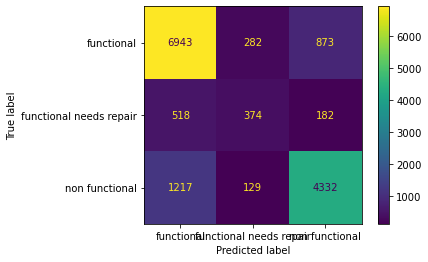

In [26]:
plot_confusion_matrix(first_GS_rfc, X_test, y_test);

In [ ]:
df['status_group']

## Second GridSearch

In [26]:
second_features = ['amount_tsh', 'gps_height', 'basin', 'region', 'district_code', 'lga', 'population', 'management', 'extraction_type_class', 'payment', 
                   'quality_group', 'quantity', 'source_class', 'waterpoint_type']
len(second_features)

14

In [27]:
features_type = GrabTypes(second_features, df)

In [28]:
features_type

(['amount_tsh', 'gps_height', 'population'],
 ['basin',
  'region',
  'district_code',
  'lga',
  'management',
  'extraction_type_class',
  'payment',
  'quality_group',
  'quantity',
  'source_class',
  'waterpoint_type'],
 [])

In [24]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, features_type[0]),
                                     ('subpipe_cat', subpipe_cat, features_type[1]),
                                     ('subpipe_bool', subpipe_bool, features_type[2])],
                       remainder='drop')

NameError: name 'features_type' is not defined

In [30]:
rfc = RandomForestClassifier(random_state=42)

second_model_pipe = Pipeline(steps = [('ct', CT),
                            ('rfc', rfc )])

In [31]:
second_model_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['basin', 'region',
                                                   'district_code', 'lga',
                                                   'management',
                                                   

In [52]:
second_model_pipe.score(X_train, y_train)

0.9320089786756454

In [53]:
second_model_pipe.score(X_test, y_test)

0.7695622895622896

In [58]:
params = {'rfc__n_estimators':[200],
          'rfc__max_depth':[None, 50],
          'rfc__min_samples_leaf': [1, 10],
          'rfc__min_samples_split': [5, 10]}
gs = GridSearchCV(estimator = second_model_pipe, param_grid = params, cv=5, verbose=3)

In [59]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.783, total=  13.0s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.9s remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.780, total=  14.0s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   26.9s remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.781, total=  14.0s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.780, total=  14.6s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.778, total=  13.7s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.791, total=  14.3s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n

[CV]  rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.767, total=  11.3s
[CV] rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.757, total=  10.5s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  8.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population']),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                            

In [60]:
gs.best_params_

{'rfc__max_depth': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 200}

In [61]:
gs.best_score_

0.784736251402918

The second model did not have an improvment in CV scores.

In [70]:
rfc.feature_importances_

array([3.74347599e-02, 1.99680606e-01, 1.10727704e-01, 5.54994002e-03,
       4.29643718e-03, 3.31393254e-03, 4.37686902e-03, 4.96463487e-03,
       3.57149221e-03, 4.12190481e-03, 3.48181061e-03, 3.64674275e-03,
       2.71437821e-03, 7.14839740e-04, 1.95412519e-03, 4.76858508e-03,
       2.00948996e-03, 3.22981168e-03, 2.94670234e-03, 1.56868717e-03,
       1.63260342e-03, 2.53670971e-03, 2.05609966e-03, 2.39215317e-03,
       1.98740381e-03, 2.24268603e-03, 2.10763037e-03, 2.16298581e-03,
       1.96564188e-03, 3.58211699e-03, 2.04643684e-03, 1.62455652e-03,
       1.83519593e-03, 1.55532981e-04, 7.29619087e-03, 4.47643497e-04,
       6.38260901e-03, 5.63112575e-04, 5.89150458e-03, 1.66085351e-03,
       1.66235094e-03, 5.25516992e-03, 7.55484378e-04, 3.86221360e-03,
       1.40653086e-03, 3.36218056e-03, 3.20368920e-04, 1.50354809e-04,
       2.27008893e-04, 6.82185469e-06, 3.24662470e-03, 1.78150237e-03,
       6.36341094e-05, 1.24266339e-03, 1.32237500e-04, 8.45302919e-04,
      

In [80]:
second_model_pipe.named_steps

{'ct': ColumnTransformer(transformers=[('subpipe_num',
                                  Pipeline(steps=[('ss', StandardScaler())]),
                                  ['amount_tsh', 'gps_height', 'population']),
                                 ('subpipe_cat',
                                  Pipeline(steps=[('ohe',
                                                   OneHotEncoder(handle_unknown='ignore',
                                                                 sparse=False))]),
                                  ['basin', 'region', 'district_code', 'lga',
                                   'management', 'extraction_type_class',
                                   'payment', 'quality_group', 'quantity',
                                   'source_class', 'waterpoint_type']),
                                 ('subpipe_bool',
                                  Pipeline(steps=[('ord', OrdinalEncoder())]),
                                  [])]),
 'rfc': RandomForestClassifier(random_s

In [90]:
#I've cracked the ohe
second_model_pipe.named_steps['ct'].transformers_[1][1].named_steps['ohe'].get_feature_names()

array(['x0_Internal', 'x0_Lake Nyasa', 'x0_Lake Rukwa',
       'x0_Lake Tanganyika', 'x0_Lake Victoria', 'x0_Pangani',
       'x0_Rufiji', 'x0_Ruvuma / Southern Coast', 'x0_Wami / Ruvu',
       'x1_Arusha', 'x1_Dar es Salaam', 'x1_Dodoma', 'x1_Iringa',
       'x1_Kagera', 'x1_Kigoma', 'x1_Kilimanjaro', 'x1_Lindi',
       'x1_Manyara', 'x1_Mara', 'x1_Mbeya', 'x1_Morogoro', 'x1_Mtwara',
       'x1_Mwanza', 'x1_Pwani', 'x1_Rukwa', 'x1_Ruvuma', 'x1_Shinyanga',
       'x1_Singida', 'x1_Tabora', 'x1_Tanga', 'x2_0', 'x2_1', 'x2_13',
       'x2_2', 'x2_23', 'x2_3', 'x2_30', 'x2_33', 'x2_4', 'x2_43', 'x2_5',
       'x2_53', 'x2_6', 'x2_60', 'x2_62', 'x2_63', 'x2_67', 'x2_7',
       'x2_8', 'x2_80', 'x3_Arusha Rural', 'x3_Arusha Urban', 'x3_Babati',
       'x3_Bagamoyo', 'x3_Bahi', 'x3_Bariadi', 'x3_Biharamulo',
       'x3_Bukoba Rural', 'x3_Bukoba Urban', 'x3_Bukombe', 'x3_Bunda',
       'x3_Chamwino', 'x3_Chato', 'x3_Chunya', 'x3_Dodoma Urban',
       'x3_Geita', 'x3_Hai', 'x3_Hanang', 'x3_Han

In [25]:
num_names = second_model_pipe.named_steps['ct'].transformers_[0][2]
num_names

NameError: name 'second_model_pipe' is not defined

In [26]:
ohe_names = second_model_pipe.named_steps['ct'].transformers_[1][1].named_steps['ohe'].get_feature_names()

NameError: name 'second_model_pipe' is not defined

In [34]:
bool_names = second_model_pipe.named_steps['ct'].transformers_[2][2]
bool_names

[]

In [35]:
all_names = np.concatenate( (num_names, ohe_names, bool_names) )
all_names

array(['amount_tsh', 'gps_height', 'population', 'x0_Internal',
       'x0_Lake Nyasa', 'x0_Lake Rukwa', 'x0_Lake Tanganyika',
       'x0_Lake Victoria', 'x0_Pangani', 'x0_Rufiji',
       'x0_Ruvuma / Southern Coast', 'x0_Wami / Ruvu', 'x1_Arusha',
       'x1_Dar es Salaam', 'x1_Dodoma', 'x1_Iringa', 'x1_Kagera',
       'x1_Kigoma', 'x1_Kilimanjaro', 'x1_Lindi', 'x1_Manyara', 'x1_Mara',
       'x1_Mbeya', 'x1_Morogoro', 'x1_Mtwara', 'x1_Mwanza', 'x1_Pwani',
       'x1_Rukwa', 'x1_Ruvuma', 'x1_Shinyanga', 'x1_Singida', 'x1_Tabora',
       'x1_Tanga', 'x2_0', 'x2_1', 'x2_13', 'x2_2', 'x2_23', 'x2_3',
       'x2_30', 'x2_33', 'x2_4', 'x2_43', 'x2_5', 'x2_53', 'x2_6',
       'x2_60', 'x2_62', 'x2_63', 'x2_67', 'x2_7', 'x2_8', 'x2_80',
       'x3_Arusha Rural', 'x3_Arusha Urban', 'x3_Babati', 'x3_Bagamoyo',
       'x3_Bahi', 'x3_Bariadi', 'x3_Biharamulo', 'x3_Bukoba Rural',
       'x3_Bukoba Urban', 'x3_Bukombe', 'x3_Bunda', 'x3_Chamwino',
       'x3_Chato', 'x3_Chunya', 'x3_Dodoma Urban', 

In [110]:
feature_importances = {name:score for name, score in zip(all_names, rfc.feature_importances_)}
feature_importances
#access OHE feature names, combine them with categorical, figure out a way to sort

{'amount_tsh': 0.037434759860479984,
 'gps_height': 0.19968060584589903,
 'population': 0.11072770441071393,
 'x0_Internal': 0.005549940015488819,
 'x0_Lake Nyasa': 0.004296437181874994,
 'x0_Lake Rukwa': 0.0033139325379740055,
 'x0_Lake Tanganyika': 0.0043768690187158356,
 'x0_Lake Victoria': 0.0049646348726644154,
 'x0_Pangani': 0.0035714922137618926,
 'x0_Rufiji': 0.00412190481118155,
 'x0_Ruvuma / Southern Coast': 0.0034818106070292104,
 'x0_Wami / Ruvu': 0.0036467427450644968,
 'x1_Arusha': 0.002714378206494305,
 'x1_Dar es Salaam': 0.0007148397396292064,
 'x1_Dodoma': 0.0019541251900774582,
 'x1_Iringa': 0.004768585082517668,
 'x1_Kagera': 0.00200948996433281,
 'x1_Kigoma': 0.003229811677110191,
 'x1_Kilimanjaro': 0.0029467023438527655,
 'x1_Lindi': 0.001568687166242695,
 'x1_Manyara': 0.0016326034195469304,
 'x1_Mara': 0.0025367097052255254,
 'x1_Mbeya': 0.0020560996595366428,
 'x1_Morogoro': 0.002392153168669276,
 'x1_Mtwara': 0.001987403813345965,
 'x1_Mwanza': 0.0022426860348

In [111]:
sorted(feature_importances, key=feature_importances.get, reverse=True)[:5]

['gps_height', 'population', 'x8_dry', 'x10_other', 'amount_tsh']

In [ ]:
feature_importances 

In [21]:
#HELPER FUNCTION TO MAP FEATURE IMPORTANCES INTO A DICT
def dict_feature_importances(pipeline):
    num_names = pipeline.named_steps['ct'].transformers_[0][2]
    ohe_names = pipeline.named_steps['ct'].transformers_[1][1].named_steps['ohe'].get_feature_names()
    bool_names = pipeline.named_steps['ct'].transformers_[2][2]
    all_names = np.concatenate( (num_names, ohe_names, bool_names) )
    
    model_name = list(pipeline.named_steps.keys())[1]
    feature_importances = {name:score for name, score in zip(all_names, pipeline.named_steps[model_name].feature_importances_)}
    return feature_importances



In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)

## Binary Target

In [25]:
df_binary = df.copy()

In [26]:
df_binary.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,id_label,status_group,coordinates,distance
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,69572,functional,"[-9.85632177, 34.93809275]",0.001616
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,8776,functional,"[-2.14746569, 34.6987661]",0.000694
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,34310,functional,"[-3.82132853, 37.46066446]",0.003466
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,67743,non functional,"[-11.15529772, 38.48616088]",0.001329
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,19728,functional,"[-1.82535885, 31.13084671]",0.005407


In [27]:
#group functional needs repair with functional category
df_binary['status_group'] = df_binary['status_group'].str.replace('functional needs repair','functional')

In [28]:
df_binary['status_group'].value_counts()

functional        35320
non functional    22268
Name: status_group, dtype: int64

In [29]:
picked_features = ['amount_tsh', 'gps_height', 'basin', 'region', 'district_code', 'lga', 'population', 
                   'public_meeting', 'management', 'permit', 'extraction_type', 'payment', 'water_quality', 'quantity', 
                   'source', 'waterpoint_type']

In [30]:
features_type = GrabTypes(picked_features, df_binary)

In [31]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, features_type[0]),
                                     ('subpipe_cat', subpipe_cat, features_type[1]),
                                     ('subpipe_bool', subpipe_bool, features_type[2])],
                       remainder='drop')

In [32]:
rfc = RandomForestClassifier(random_state=42)

binary_model_pipe = Pipeline(steps = [('ct', CT),
                            ('rfc', rfc )])

In [125]:
binary_model_pipe.fit(X_train, y_train)
binary_model_pipe.score(X_train, y_train)

0.9320089786756454

In [122]:
params = {'rfc__n_estimators':[200],
          'rfc__max_depth':[None, 50],
          'rfc__min_samples_leaf': [1, 10],
          'rfc__min_samples_split': [5, 10]}
gs = GridSearchCV(estimator = binary_model_pipe, param_grid = params, cv=5, verbose=3)

In [123]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.783, total=  10.4s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.780, total=  10.3s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.6s remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.781, total=  10.7s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.780, total=  10.7s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.778, total=   9.7s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.791, total=  10.2s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n

[CV]  rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.767, total=   7.7s
[CV] rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.757, total=   7.1s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  5.9min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population']),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                            

In [33]:
gs.best_score_

NameError: name 'gs' is not defined

In [34]:
y_train.value_counts()

functional                 23519
non functional             16750
functional needs repair     2922
Name: status_group, dtype: int64

In [35]:
y.value_counts()

functional                 31389
non functional             22268
functional needs repair     3931
Name: status_group, dtype: int64

In [36]:
y= y.str.replace('functional needs repair','functional')

In [37]:
y.value_counts()

functional        35320
non functional    22268
Name: status_group, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
y_train.value_counts()

functional        26441
non functional    16750
Name: status_group, dtype: int64

In [136]:
rfc = RandomForestClassifier(random_state=42)

binary_model_pipe = Pipeline(steps = [('ct', CT),
                            ('rfc', rfc )])

In [137]:
binary_model_pipe.fit(X_train, y_train)
binary_model_pipe.score(X_train, y_train)

0.9518518518518518

In [138]:
params = {'rfc__n_estimators':[200],
          'rfc__max_depth':[None, 50],
          'rfc__min_samples_leaf': [1, 10],
          'rfc__min_samples_split': [5, 10]}
gs = GridSearchCV(estimator = binary_model_pipe, param_grid = params, cv=5, verbose=3)

In [139]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.839, total=  11.0s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.839, total=  10.3s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   21.2s remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.833, total=  10.5s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.840, total=  10.4s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.837, total=  10.1s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.846, total=  10.5s
[CV] rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n

[CV]  rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.822, total=   8.3s
[CV] rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=50, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.813, total=   8.5s


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.2min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population']),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                            

In [140]:
gs.best_score_

0.8413916947250281

### Binary Target using First Model Features

In [40]:
picked_features = ['amount_tsh', 'installer',  'gps_height', 'basin', 'region', 'district_code', 'lga', 'population', 
                   'public_meeting', 'management', 'permit', 'extraction_type', 'payment', 'water_quality', 'quantity', 
                   'source', 'waterpoint_type']

In [41]:
features_type = GrabTypes(picked_features, df_binary)
features_type

(['amount_tsh', 'gps_height', 'population'],
 ['installer',
  'basin',
  'region',
  'district_code',
  'lga',
  'management',
  'extraction_type',
  'payment',
  'water_quality',
  'quantity',
  'source',
  'waterpoint_type'],
 ['public_meeting', 'permit'])

In [42]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, features_type[0]),
                                     ('subpipe_cat', subpipe_cat, features_type[1]),
                                     ('subpipe_bool', subpipe_bool, features_type[2])],
                       remainder='drop')

In [40]:
rfc = RandomForestClassifier(random_state=42)

binary_pipe_1 = Pipeline(steps = [('ct', CT),
                                  ('rfc', rfc )])

In [38]:
binary_pipe_1.fit(X_train, y_train)
binary_pipe_1.score(X_train, y_train)

0.9646917181820287

In [41]:
params = {'rfc__n_estimators':[200],
          'rfc__max_depth':[None, 20],
          'rfc__min_samples_leaf': [1, 10],
          'rfc__min_samples_split': [5, 10],
          'rfc__max_leaf_nodes': [None, 25]}
gs = GridSearchCV(estimator = binary_pipe_1, param_grid = params, cv=5, verbose=3)

In [42]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.840, total= 1.6min
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.842, total=  48.1s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.4min remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.841, total=  48.2s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.850, total=  49.0s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.844, total=  50.1s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.843, total=  47.3s
[CV]

[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.753, total=  20.2s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.762, total=  20.3s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.761, total=  20.3s
[CV] rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=None, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=10, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.756, total=  20.8s
[CV] rfc__m

[CV]  rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.756, total=  21.4s
[CV] rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.763, total=  21.6s
[CV] rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200 
[CV]  rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=5, rfc__n_estimators=200, score=0.761, total=  21.8s
[CV] rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 
[CV]  rfc__max_depth=20, rfc__max_leaf_nodes=25, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.757, total=  22.5s
[CV] rfc__max_depth=20, rfc__max

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 40.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['amount_tsh',
                                                                          'gps_height',
                                                                          'population']),
                                                                        ('subpipe_cat',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                            

In [43]:
gs.best_params_

{'rfc__max_depth': None,
 'rfc__max_leaf_nodes': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 200}

In [44]:
gs.best_score_

0.8444352102593919

In [44]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, 
                             min_samples_split=10, random_state=42)

binary_pipe_1 = Pipeline(steps = [('ct', CT),
                                  ('rfc', rfc )])

In [171]:
list(binary_pipe_1.named_steps.keys())[1]

'rfc'

In [45]:
binary_pipe_1.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['installer', 'basin',
                                                   'region', 'district_code',
                                                   'lga', 'management',
                                      

In [178]:
feature_importances = dict_feature_importances(binary_pipe_1)
feature_importances

{'amount_tsh': 0.03297823790581064,
 'gps_height': 0.13963379795960087,
 'population': 0.07967403182995116,
 'x0_-': 4.288670331541956e-06,
 'x0_AAR': 6.455030044065494e-05,
 'x0_ABASIA': 4.500204709519967e-05,
 'x0_ABD': 7.36424033486618e-06,
 'x0_ABDALA': 1.1819303213770498e-06,
 'x0_ABDUL': 2.6866340651315477e-06,
 'x0_AC': 5.518831491957551e-06,
 'x0_ACORD': 9.12705291618856e-06,
 'x0_ACRA': 0.00021656999351684963,
 'x0_ACT': 1.0076777899552609e-05,
 'x0_ACTION AID': 1.3583956450348687e-06,
 'x0_ACTIVE TANK CO': 3.917320880523683e-06,
 'x0_ACTIVE TANK CO LTD': 1.5599426487834259e-06,
 'x0_AD': 6.79188298748782e-05,
 'x0_ADAP': 4.046084207860421e-05,
 'x0_ADB': 5.0064129836148804e-05,
 'x0_ADP': 9.951631902526392e-05,
 'x0_ADP Busangi': 5.831163961987951e-05,
 'x0_ADRA': 0.00018646700506103086,
 'x0_ADRA /Government': 1.1584581045298496e-05,
 'x0_ADRA/Government': 3.77188837855331e-06,
 'x0_AF': 8.229339568656426e-05,
 'x0_AFRICA': 3.183165620109528e-06,
 'x0_AFRICA MUSLIM': 1.79215

In [176]:
sorted(feature_importances, key=feature_importances.get, reverse=True)[:20]

['gps_height',
 'x9_dry',
 'population',
 'x9_enough',
 'amount_tsh',
 'x11_other',
 'x6_other',
 'x9_insufficient',
 'x11_communal standpipe',
 'x7_never pay',
 'x11_hand pump',
 'x0_DWE',
 'x5_vwc',
 'permit',
 'x6_gravity',
 'x6_nira/tanira',
 'x8_soft',
 'x10_spring',
 'x9_seasonal',
 'x11_communal standpipe multiple']

In [46]:
#best model evaluation on test data
gs.score(X_test, y_test)

0.8485101062721401

In [46]:
binary_pipe_1.score(X_test, y_test)

0.8485101062721401

## Visualizations

In [47]:
y_preds = binary_pipe_1.predict(X_test)

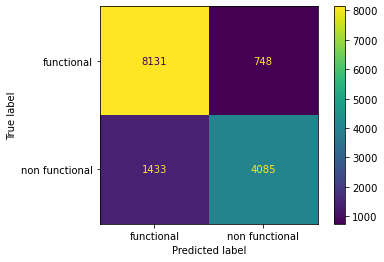

In [48]:
#confusion matrix of final model on test data
plot_confusion_matrix(binary_pipe_1, X_test, y_test);

In [49]:
conf_matrix = confusion_matrix(y_test, y_preds)
conf_matrix

array([[8131,  748],
       [1433, 4085]], dtype=int64)

<ipython-input-81-331897389860>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels, rotation = 50)


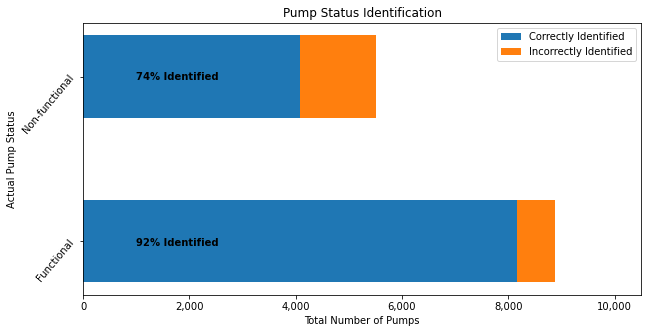

In [81]:
fig, ax = plt.subplots(figsize=(10,5))

true_func = 8168
false_func = 1443
true_nonfunc = 4075
false_nonfunc = 711

labels = ['Functional', 'Non-functional']
correct_predict = [true_func, true_nonfunc]
incorrect_predict = [false_nonfunc, false_func]

ax.barh(labels, correct_predict, label='Correctly Identified', height=0.5)
ax.barh(labels, incorrect_predict, 
        left=correct_predict, label='Incorrectly Identified', height =0.5)

ax.set_xlim(0, 10_500)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_yticklabels(labels, rotation = 50)

#annotations
plt.annotate('92% Identified', (1_000, -0.03), weight='bold')
plt.annotate('74% Identified', (1_000, 0.98), weight='bold')

ax.set_ylabel('Actual Pump Status')
ax.set_xlabel('Total Number of Pumps')
ax.set_title('Pump Status Identification')
ax.legend();

plt.savefig('./model_identification_results.png', dpi=300)

# Model with Engineered 'Distance' Feature

In [59]:
picked_features = ['amount_tsh', 'installer', 'gps_height', 'basin', 'region', 'district_code', 'lga', 'population', 
                   'public_meeting', 'management', 'permit', 'extraction_type', 'payment', 'water_quality', 'quantity', 
                   'source', 'waterpoint_type', 'distance']

In [60]:
features_type = GrabTypes(picked_features, df_binary)
features_type

(['amount_tsh', 'gps_height', 'population', 'distance'],
 ['installer',
  'basin',
  'region',
  'district_code',
  'lga',
  'management',
  'extraction_type',
  'payment',
  'water_quality',
  'quantity',
  'source',
  'waterpoint_type'],
 ['public_meeting', 'permit'])

In [61]:
CT = ColumnTransformer(transformers=[('subpipe_num', subpipe_num, features_type[0]),
                                     ('subpipe_cat', subpipe_cat, features_type[1]),
                                     ('subpipe_bool', subpipe_bool, features_type[2])],
                       remainder='drop')

In [62]:
rfc = RandomForestClassifier(random_state=42)

feature_pipe = Pipeline(steps = [('ct', CT),
                            ('rfc', rfc )])

In [63]:
params = {'rfc__n_estimators':[200],
          'rfc__max_depth':[None, 30],
          'rfc__min_samples_leaf': [1, 10],
          'rfc__min_samples_split': [10, 15], 
          'rfc__max_leaf_nodes': [None, 25]}
gs = GridSearchCV(estimator = feature_pipe, param_grid = params, cv=5, verbose=3)

In [58]:
gs.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] rfc__max_depth=None, rfc__max_features=sqrt, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rfc__max_depth=None, rfc__max_features=sqrt, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.791, total= 3.1min
[CV] rfc__max_depth=None, rfc__max_features=sqrt, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.1min remaining:    0.0s


[CV]  rfc__max_depth=None, rfc__max_features=sqrt, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200, score=0.790, total= 3.0min
[CV] rfc__max_depth=None, rfc__max_features=sqrt, rfc__max_leaf_nodes=None, rfc__min_samples_leaf=1, rfc__min_samples_split=10, rfc__n_estimators=200 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.0min remaining:    0.0s


KeyboardInterrupt: 

In [61]:
gs.best_score_

0.8444352075792775

In [62]:
gs.best_params_

{'rfc__max_depth': None,
 'rfc__max_leaf_nodes': None,
 'rfc__min_samples_leaf': 1,
 'rfc__min_samples_split': 10,
 'rfc__n_estimators': 200}

In [178]:
feature_pipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'population']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['payment', 'quantity',
                                                   'source',
                                                   'waterpoint_type']),
                                                 ('sub

In [180]:
feature_pipe.score(X_train, y_train)

0.9316947250280584

In [ ]:
picked_features = ['amount_tsh', 'installer', 'gps_height', 'basin', 'region_code', 'district_code', 'lga', 'population', 
                   'public_meeting', 'management', 'permit', 'extraction_type_class', 'payment', 'quality_group', 'quantity', 
                   'source', 'waterpoint_type', 'distance']

In [ ]:
params = {'rfc__n_estimators':[200],
          'rfc__max_depth':[None, 30],
          'rfc__min_samples_leaf': [1, 5],
          'rfc__min_samples_split': [10, 15], 
          'rfc__max_leaf_nodes': [None, 25],
          'rfc__max_features': ['sqrt', 'log2']}
gs = GridSearchCV(estimator = feature_pipe, param_grid = params, cv=5, verbose=3)